# Exercise 1: Familiarize yourself with `pandas`
If you are new to Python, check out the introductory Python courses available through Caltrans's LinkedIn Learning Library:
* https://www.linkedin.com/learning/search?keywords=python&u=36029164

Skills: 
* `pandas` is one of the base Python packages for working with tabular data.
* Do some grouping and aggregation. Many ways to do this!
* Export to Google Cloud Storage
* Practice committing on GitHub

References: 
* https://docs.calitp.org/data-infra/analytics_new_analysts/01-data-analysis-intro.html
* https://docs.calitp.org/data-infra/analytics_tools/saving_code.html
* https://pandas.pydata.org/docs/reference/frame.html

In [151]:
from siuba import *
from siuba.data import mtcars

import pandas as pd
#alias

## Groupby / Aggregation

* By cylinder categories, calculate the average mpg and find difference between max and min weight.
* Hint: for `pandas`: `groupby / agg`, `pivot_table`, `groupby / transform`
* Hint: for `siuba`: `groupby`, `summarize`

In [154]:
#group mtcars table by cylinder, aggregate by mpg and calculate the average
avg_mpg_by_cyl = mtcars.groupby('cyl').agg('mpg').mean()
print("\n Grouping mtcars table by cylinder, aggregate by mpg and calculating the average.")
print(avg_mpg_by_cyl)

#calculatate the max and min values in mtcars
max_mtcars = mtcars.max()
print(max_mtcars)
min_mtcars = mtcars.min()
print("\n Calculatating the max and min values in mtcars.")
print(min_mtcars)

#find the difference between max an min weight
max_min_diff_wt_mtcars = max_mtcars.wt - min_mtcars.wt
print("\n Finding the difference between max an min weight")
print(max_min_diff_wt_mtcars)
    


 Grouping mtcars table by cylinder, aggregate by mpg and calculating the average.
cyl
4    26.663636
6    19.742857
8    15.100000
Name: mpg, dtype: float64
mpg      33.900
cyl       8.000
disp    472.000
hp      335.000
drat      4.930
wt        5.424
qsec     22.900
vs        1.000
am        1.000
gear      5.000
carb      8.000
dtype: float64

 Calculatating the max and min values in mtcars.
mpg     10.400
cyl      4.000
disp    71.100
hp      52.000
drat     2.760
wt       1.513
qsec    14.500
vs       0.000
am       0.000
gear     3.000
carb     1.000
dtype: float64

 Finding the difference between max an min weight
3.9110000000000005


## Functions

* Create a new column using a lambda function and tag 6 cylinder values with "six", and all other values as "other"
* Write a function that tags each cylinder value with the word (ex: 6 as "six", 8 as "eight")

In [155]:
# new column in mtcars that tags 6 cylinder values as "six" and all others as "other"
def cyl6(row):
    if row.cyl == 6:
        return 'six'
    else:
        return 'other'

mtcars['cyl_six'] = mtcars.apply(lambda row:cyl6(row),axis=1)
display(mtcars)


#new column that tags cylinder number values with text values
def int_to_english(row):
    if row.cyl == 1:
        return 'one'
    elif row.cyl == 2:
        return 'two'
    elif row.cyl == 3:
        return 'three'
    elif row.cyl == 4:
        return 'four'
    elif row.cyl == 5:
        return 'five'
    elif row.cyl == 6:
        return 'six'
    elif row.cyl == 7:
        return 'seven'
    elif row.cyl == 8:
        return 'eight'
    else:
        return 'none'

mtcars['cyl_text'] = mtcars.apply(lambda row: int_to_english(row),axis=1)
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cyl_six
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,six
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,six
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,other
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,six
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,other
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,six
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,other
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,other
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,other
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,six


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cyl_six,cyl_text
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,six,six
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,six,six
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,other,four
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,six,six
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,other,eight
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,six,six
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,other,eight
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,other,four
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,other,four
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,six,six


## Export to Google Cloud Storage (GCS)
* https://docs.calitp.org/data-infra/analytics_tools/storing_data.html?highlight=google%20cloud
* Make sure credential works
* Use this path: "gs://calitp-analytics-data/data-analyses/FILENAME"
* Export using `df.to_parquet()` and `df.to_csv()`

In [163]:
#see relative path vs absolute path

#Already in '/home/jovyan/data-analyses/starter_kit/monica_exercises', so only need the file name

#File to notebook with relative path
mtcars.to_csv('./mtcars_basic01.csv')

#Write a DataFrame to the binary parquet format
mtcars.to_parquet('./mtcars_basic01.parquet')

In [170]:
#pwd - print working directory
#ls - list files in working directory

## Make a chart

* Read in the parquet file from GCS.
* Make a visualization using one of the charting packages.
* Name this notebook `YOURNAME_exercise1.ipynb`
    * If you need to rename because you already named it, do it within the terminal.
    * `git mv OLDNAME.ipynb NEWNAME.ipynb`. 
    * The `mv` stands for move, and renaming a file is basically "moving" its path. Doing it this way retains the git history associated with the notebook. If you rename directly with right click, rename, you destroy the git history.
* Use a descriptive commit message (ex: adding chart, etc). GitHub already tracks who makes the commit, the date, the timestamp of it, the files being affected, so your commit message should be more descriptive than the metadata already stored.
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

In [185]:
df = pd.read_parquet('./mtcars_basic01.parquet')

In [186]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cyl_six,cyl_text
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,six,six
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,six,six
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,other,four
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,six,six
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,other,eight
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,six,six
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,other,eight
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,other,four
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,other,four
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,six,six


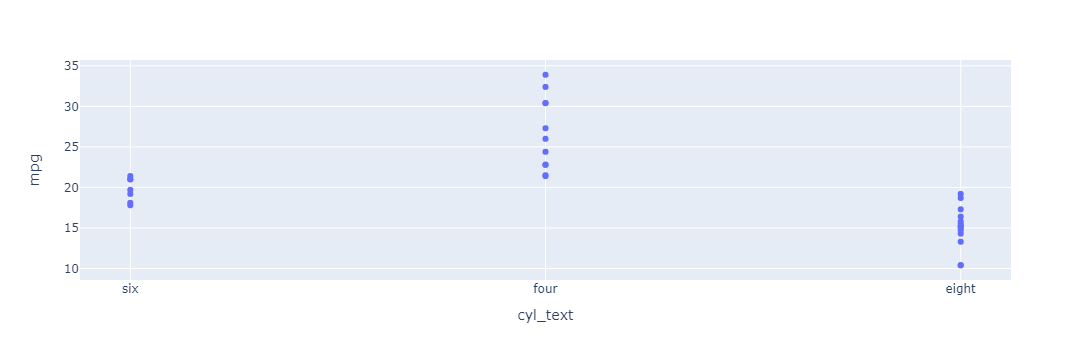

In [194]:
pd.options.plotting.backend = "plotly"
df.plot(kind="scatter", x="cyl_text", y="mpg")